In [1]:
from FK import *
import pyvoro
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
%matplotlib widget 

## Define unit cells

### Triangular unit cell

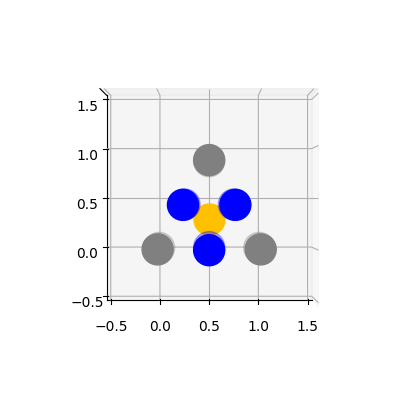

In [3]:
c_wht, c_blu, c_ylw = unitcell_TR1([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([2,2,1])
ax.view_init(elev=90, azim=-90)

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=500)

ax.set_zticks([])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(0,1)
plt.show()

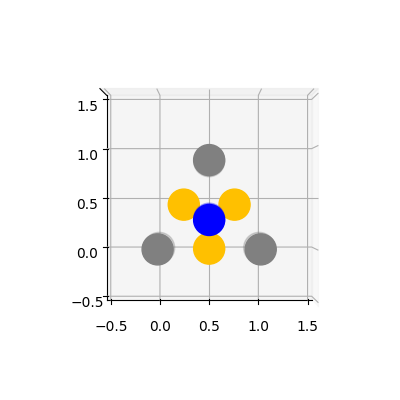

In [4]:
c_wht, c_blu, c_ylw = unitcell_TR2([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([2,2,1])
ax.view_init(elev=90, azim=-90)

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=500)

ax.set_zticks([])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(0,1)
plt.show()

### Square unit cell

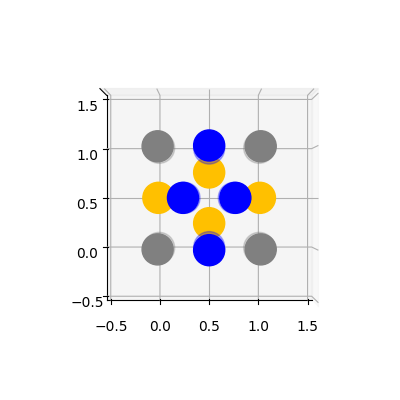

In [5]:
c_wht, c_blu, c_ylw = unitcell_SQ([0,0,0], 0)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([2,2,1])
ax.view_init(elev=90, azim=-90)

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=500)

ax.set_zticks([])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(0,1)
plt.show()

### FK sigma phase primitive unit cell

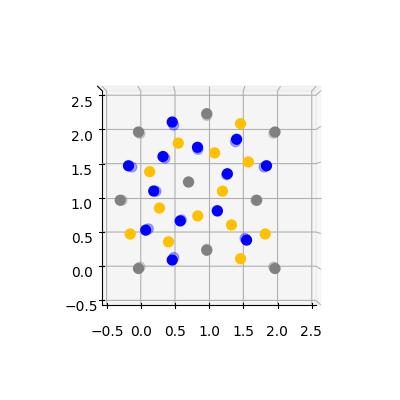

In [6]:
c_wht, c_blu, c_ylw = c_sigma_unit([0,0,0], Ratio_ca=1.9, PBC=False)

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([3,3,1])
ax.view_init(elev=90, azim=-90)

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=50)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=50)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=50)

ax.set_zticks([])
ax.set_xlim(-0.5,2.5)
ax.set_ylim(-0.5,2.5)
ax.set_zlim(0,1)
plt.show()

### Pack the FK sigma phase unit cells

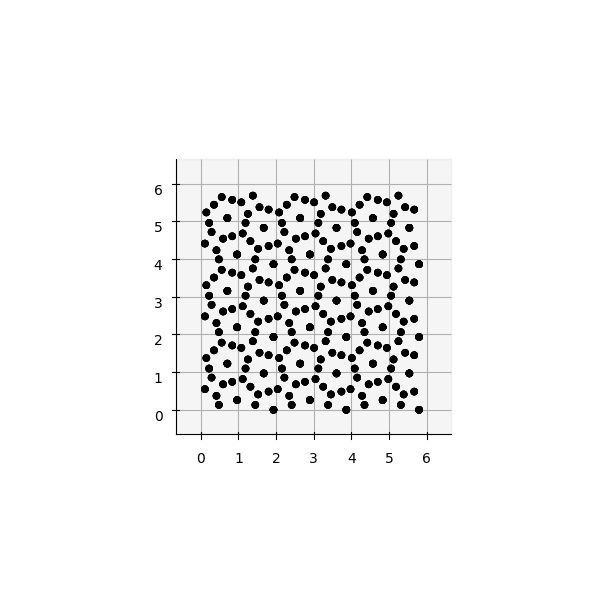

In [7]:
n_x = 3
n_y = 3
n_layers = 6
r_ca = 1.9
r = 1/r_ca
l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)*r

c_layer_sigma = c_sigma(n_x,n_y,Ratio_ca=1/r)
c_rod = stack_coords([shift_coords(c_layer_sigma, np.array([0,0,l_c])*s) for s in range(n_layers)])
l = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
bounds = np.array([[0,n_x*l],[0,n_y*l],[0,n_layers*l_c]])
points = np.vstack(c_rod)

fig = plt.figure(figsize=(6,6))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])
ax.set_proj_type('ortho')
ax.view_init(elev=90, azim=-90)

ax.scatter(points[:,0],points[:,1],points[:,2],
           marker='o',c='k',s=20)
ax.set_zticks([])
ax.set_xlim(-0.5,6.5)
ax.set_ylim(-0.5,6.5)
ax.set_zlim(-0.5,6.5)
plt.show()

## Evaluate the Voronoi cell size

In [8]:
def area_vertices(vertices):
    f_cm = np.mean(vertices,axis=0)
    vertices = vertices - f_cm
    i_1 = np.arange(len(vertices))
    i_2 = (i_1+1)%len(i_1)
    A = [np.cross(vertices[i_1[j]],vertices[i_2[j]]) for j in range(len(i_1))]
    area = np.linalg.norm(np.sum(A,axis=0)/2)
    return area

In [9]:
n_x = 1
n_y = 1
n_layers = 1

# Choose c/a ratio here
# r_ca = [0.426,0.459,0.473,0.496,0.511,0.515,0.518,0.522,0.533,0.535]
# r_ca = [228/431]
# r_ca = [1/1.9]
r_ca = [0.525]

# Iterate over c/a ratios
for i_r, r in enumerate(r_ca):
    e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
    e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
    
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)*r
#     print(l_c)
    
    # Generate a FK sigma primitive unit cell
    c_layer_sigma = c_sigma(n_x,n_y,Ratio_ca=1/r)
    c_rod = stack_coords([shift_coords(c_layer_sigma, np.array([0,0,l_c])*s) for s in range(n_layers)])

    l = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
    bounds = np.array([[0,n_x*l],[0,n_y*l],[0,n_layers*l_c]])
    points = np.vstack(c_rod)
    
    # Call pyvoro.compute_voronoi function to evaluate the Voronoi tessellations
    voro = pyvoro.compute_voronoi(points,bounds,0.7,periodic=[True]*3)
    
    list_origin = [v['original'] for v in voro]
    list_volume = [v['volume'] for v in voro]
    list_volume_round = [np.round(v['volume'],decimals=9) for v in voro]
    list_vertices = [v['vertices'] for v in voro]
    list_adjacency = [v['adjacency'] for v in voro]
    list_faces = [v['faces'] for v in voro]
    list_coords = [len(v['faces']) for v in voro]
    
    # Pick up the unique elements from the list of Voronoi cell volume
    unique_volume, inices, counts = np.unique(list_volume_round,return_counts=True,return_index=True)
    unique_volume_reduced = unique_volume*np.sum(counts)/np.sum(counts*unique_volume)
    unique_adjacency = np.array(list_coords)[inices]
    
    # Isoperimetric quotient (IQ)
    unique_IQ = []
    for i_cell in range(len(unique_volume)):
        vertices = np.array(list_vertices[inices.tolist()[i_cell]])
        v_cm = np.mean(vertices,axis=0)
        vertices = vertices-v_cm
        faces = list_faces[inices.tolist()[i_cell]]
    
        area_sum = 0
        for i_faces, face in enumerate(faces):
            vertices_face_list = vertices[face['vertices']].tolist()
            area = area_vertices(vertices_face_list)
            area_sum += area
            
        unique_IQ.append(36*np.pi*unique_volume[i_cell]**2/area_sum**3)
    
    # Print the results
    print('------------------')
    print('c/a ratio\n{:0.4f}'.format(r))
    print('\nCounts    Volume    Coordinates    IQ')
    for i in range(len(counts)):
        print('{:d}         {:0.4f}    {:d}             {:0.4f}'.format(counts[i], 
                                                    unique_volume_reduced[i], 
                                                    unique_adjacency[i],
                                                    unique_IQ[i]))
        
    print('\nUnit cell volume \n{:0.4f}\n'.format(sum(counts*unique_volume_reduced)))

------------------
c/a ratio
0.5250

Counts    Volume    Coordinates    IQ
2         0.8975    12             0.7421
8         0.9384    12             0.7462
8         1.0138    14             0.7677
8         1.0350    14             0.7688
4         1.0767    15             0.7852

Unit cell volume 
30.0000



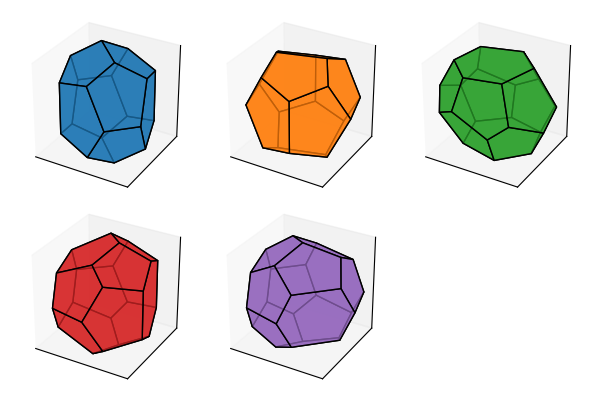

In [10]:
n_x = 1
n_y = 1
n_layers = 1

# Choose c/a ratio here
r_ca = [228/431]
# r_ca = [1/1.9]
r_ca = [0.525]

# Iterate over c/a ratios
for i_r, r in enumerate(r_ca):
    e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
    e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
    
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)*r
#     print(l_c)
    
    # Generate a FK sigma primitive unit cell
    c_layer_sigma = c_sigma(n_x,n_y,Ratio_ca=1/r)
    c_rod = stack_coords([shift_coords(c_layer_sigma, np.array([0,0,l_c])*s) for s in range(n_layers)])

    l = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
    bounds = np.array([[0,n_x*l],[0,n_y*l],[0,n_layers*l_c]])
    points = np.vstack(c_rod)
    
    # Call pyvoro.compute_voronoi function to evaluate the Voronoi tessellations
    voro = pyvoro.compute_voronoi(points,bounds,0.7,periodic=[True]*3)
    
    list_origin = [v['original'] for v in voro]
    list_volume = [v['volume'] for v in voro]
    list_volume_round = [np.round(v['volume'],decimals=9) for v in voro]
    list_vertices = [v['vertices'] for v in voro]
    list_adjacency = [v['adjacency'] for v in voro]
    list_faces = [v['faces'] for v in voro]
    list_coords = [len(v['faces']) for v in voro]
    
    # Pick up the unique elements from the list of Voronoi cell volume
    unique_volume, inices, counts = np.unique(list_volume_round,return_counts=True,return_index=True)
    unique_volume_reduced = unique_volume*np.sum(counts)/np.sum(counts*unique_volume)
    unique_adjacency = np.array(list_coords)[inices]
    
    # list of reduced cell volumes
    list_volume_reduced = np.array(list_volume)*np.sum(counts)/np.sum(counts*unique_volume) 
    
fig = plt.figure(figsize=(6,4))
colors = ['C0','C1','C2','C3','C4']
box_size = 0.3

for i_cell in range(len(unique_volume_reduced)):
    ax = fig.add_subplot(2, 3, i_cell+1, projection='3d')
    ax.set_box_aspect([1,1,1])

    vertices = np.array(list_vertices[inices.tolist()[i_cell]])
    v_cm = np.mean(vertices,axis=0)
    vertices = vertices-v_cm
    faces = list_faces[inices.tolist()[i_cell]]

    for i_faces, face in enumerate(faces):
        vertices_face_list = vertices[face['vertices']].tolist()
        pgs = [list(tuple(x for x in v) for v in vertices_face_list)]
        collection_v = Poly3DCollection(pgs, 
                                        facecolors=colors[i_cell], linewidths=1, edgecolors='k', alpha=.75)

        ax.add_collection3d(collection_v)

    
    ax.set_xlim(-box_size,box_size)
    ax.set_ylim(-box_size,box_size)
    ax.set_zlim(-box_size,box_size)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.tight_layout()
plt.show()

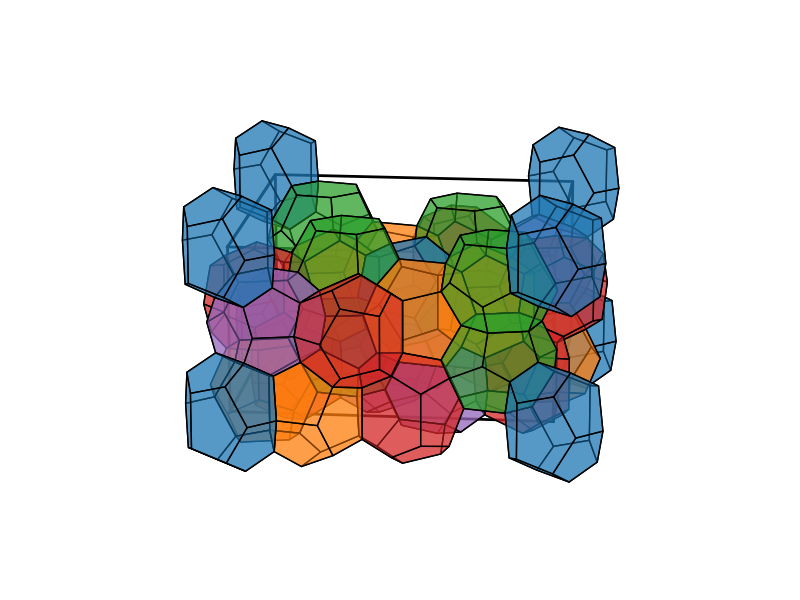

In [11]:
n_x = 1
n_y = 1
n_layers = 1

# Choose c/a ratio here
r_ca = [228/431]
# r_ca = [1/1.9]
r_ca = [0.525]

# Iterate over c/a ratios
for i_r, r in enumerate(r_ca):
    e_SQ = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2]])
    e_TR = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/3]])
    
    l_c = 1*np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)*r
#     print(l_c)
    
    # Generate a FK sigma primitive unit cell
    c_layer_sigma = c_sigma(n_x,n_y,Ratio_ca=1/r)
    c_rod = stack_coords([shift_coords(c_layer_sigma, np.array([0,0,l_c])*s) for s in range(n_layers)])

    l = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)
    bounds = np.array([[0,n_x*l],[0,n_y*l],[0,n_layers*l_c]])
    points = np.vstack(c_rod)

    sigma = 1e-16
    c_center = np.array([l-np.sqrt(6)/4,np.sqrt(6)/4,0])
    c_shift = np.array([l/2,l/2+sigma,0])-c_center
    points = points + c_shift
    L = bounds[:,1]-bounds[:,0]
    points = points-np.floor(points/L)*L
    
    # Call pyvoro.compute_voronoi function to evaluate the Voronoi tessellations
    voro = pyvoro.compute_voronoi(points,bounds,0.7,periodic=[True]*3)
    
    list_origin = [v['original'] for v in voro]
    list_volume = [v['volume'] for v in voro]
    list_volume_round = [np.round(v['volume'],decimals=9) for v in voro]
    list_vertices = [v['vertices'] for v in voro]
    list_adjacency = [v['adjacency'] for v in voro]
    list_faces = [v['faces'] for v in voro]
    list_coords = [len(v['faces']) for v in voro]
    
    # Pick up the unique elements from the list of Voronoi cell volume
    unique_volume, inices, counts = np.unique(list_volume_round,return_counts=True,return_index=True)
    unique_volume_reduced = unique_volume*np.sum(counts)/np.sum(counts*unique_volume)
    unique_adjacency = np.array(list_coords)[inices]
    
    # list of reduced cell volumes
    list_volume_reduced = np.array(list_volume)*np.sum(counts)/np.sum(counts*unique_volume) 

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_box_aspect([l,l,l_c])

points_list = []
for i_cell in range(len(points)):
    vertices = np.array(list_vertices[i_cell])
    v_cm = np.mean(vertices,axis=0)
    vertices = vertices
    faces = list_faces[i_cell]
    volume = list_volume_reduced[i_cell]
    i_type = np.argmin(np.abs(unique_volume_reduced-volume))

    # ax.plot(points[i_cell,0],points[i_cell,1],points[i_cell,2],'k.',markersize=10)
    points_list.append(points[i])

    for i_faces, face in enumerate(faces):
        vertices_face_list = vertices[face['vertices']].tolist()
        pgs = [list(tuple(x for x in v) for v in vertices_face_list)]
        collection_v = Poly3DCollection(pgs, 
                                        facecolors=colors[i_type], linewidths=1, edgecolors='k', alpha=.5)

        ax.add_collection3d(collection_v)

i_cell = 16
vertices = np.array(list_vertices[i_cell])
v_cm = np.mean(vertices,axis=0)
vertices = vertices
faces = list_faces[i_cell]
volume = list_volume_reduced[i_cell]
i_type = np.argmin(np.abs(unique_volume_reduced-volume))

c_list = [[l,0,0],[0,l,0],[0,0,l_c],[l,l,0],[0,l,l_c],[l,0,l_c],[l,l,l_c]]

for c in c_list:
    # ax.plot(c_list[0],c_list[1],c_list[2],'k.',markersize=10)
    points_list.append(c)

    for i_faces, face in enumerate(faces):
        vertices_face_list = vertices[face['vertices']].tolist()
        pgs = [list(tuple(x for x in v) for v in np.array(vertices_face_list)+c)]
        collection_v = Poly3DCollection(pgs, 
                                        facecolors=colors[i_type], linewidths=1, edgecolors='k', alpha=.5)

        ax.add_collection3d(collection_v)

ax.plot([0,l,l,0,0],[0,0,l,l,0],[0,0,0,0,0],'-k',lw=2)
ax.plot([0,l,l,0,0],[0,0,l,l,0],[l_c,l_c,l_c,l_c,l_c],'-k',lw=2)
ax.plot([0,0,0,0,0],[0,0,l,l,0],[0,l_c,l_c,0,0],'-k',lw=2)
ax.plot([l,l,l,l,l],[0,0,l,l,0],[0,l_c,l_c,0,0],'-k',lw=2)
    
ax.set_xlim(0-l/10,l+l/1/10)
ax.set_ylim(0-l/10,l+l/1/10)
ax.set_zlim(0-l_c/10,l_c+l_c/1/10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.view_init(elev=15, azim=-84)
ax.axis('off')

plt.tight_layout()
plt.show()
    
    